# Titanic Classifications
---

In this project, we aim to build a system that predicts whether a passenger would have survived the Titanic disaster using an Artificial Neural Network (ANN). By analyzing various factors such as socio-economic status, age, gender, and more, we seek to determine which attributes played the most significant roles in survival.

## Importing Libraries

#### Data Preprocessing & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import  LabelEncoder, StandardScaler, Normalizer, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

#### Model Building and Evaluation

In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

#### Statistics and Others

In [3]:
import random

import os

import tensorflow as tf

## Loading Dataset

In [4]:
os.listdir()

['.config', 'Titanic-Dataset.csv', '.ipynb_checkpoints']

In [5]:
dataset = pd.read_csv('Titanic-Dataset.csv')

### Dataset Description
Our dataset consists of information about passengers who were on the Titanic. It includes the following features:

- PassengerId: A unique identifier for each passenger. **(unique)**
- Survived: Whether the passenger survived (1) or not (0).
- TicketClass: The class of the ticket the passenger purchased (1st, 2nd, or 3rd class).
- Name: The name of the passenger.
- Sex: The gender of the passenger.
- Age: The age of the passenger.
- SiblingsSpouse: The number of siblings or spouses aboard the Titanic.
- ParentChildren: The number of parents or children aboard the Titanic.
- Ticket: The ticket number. **(unique)**
- Fare: The amount of money paid for the ticket.
- Cabin: The cabin number where the passenger stayed.
- Embarked: The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).

In [6]:
dataset.head()

,PassengerId,Survived,TicketClass,Name,Sex,Age,SiblingsSpouse,ParentChildren,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

#### Checking for missing Values in the dataset

Visualize missing values using a matrix plot

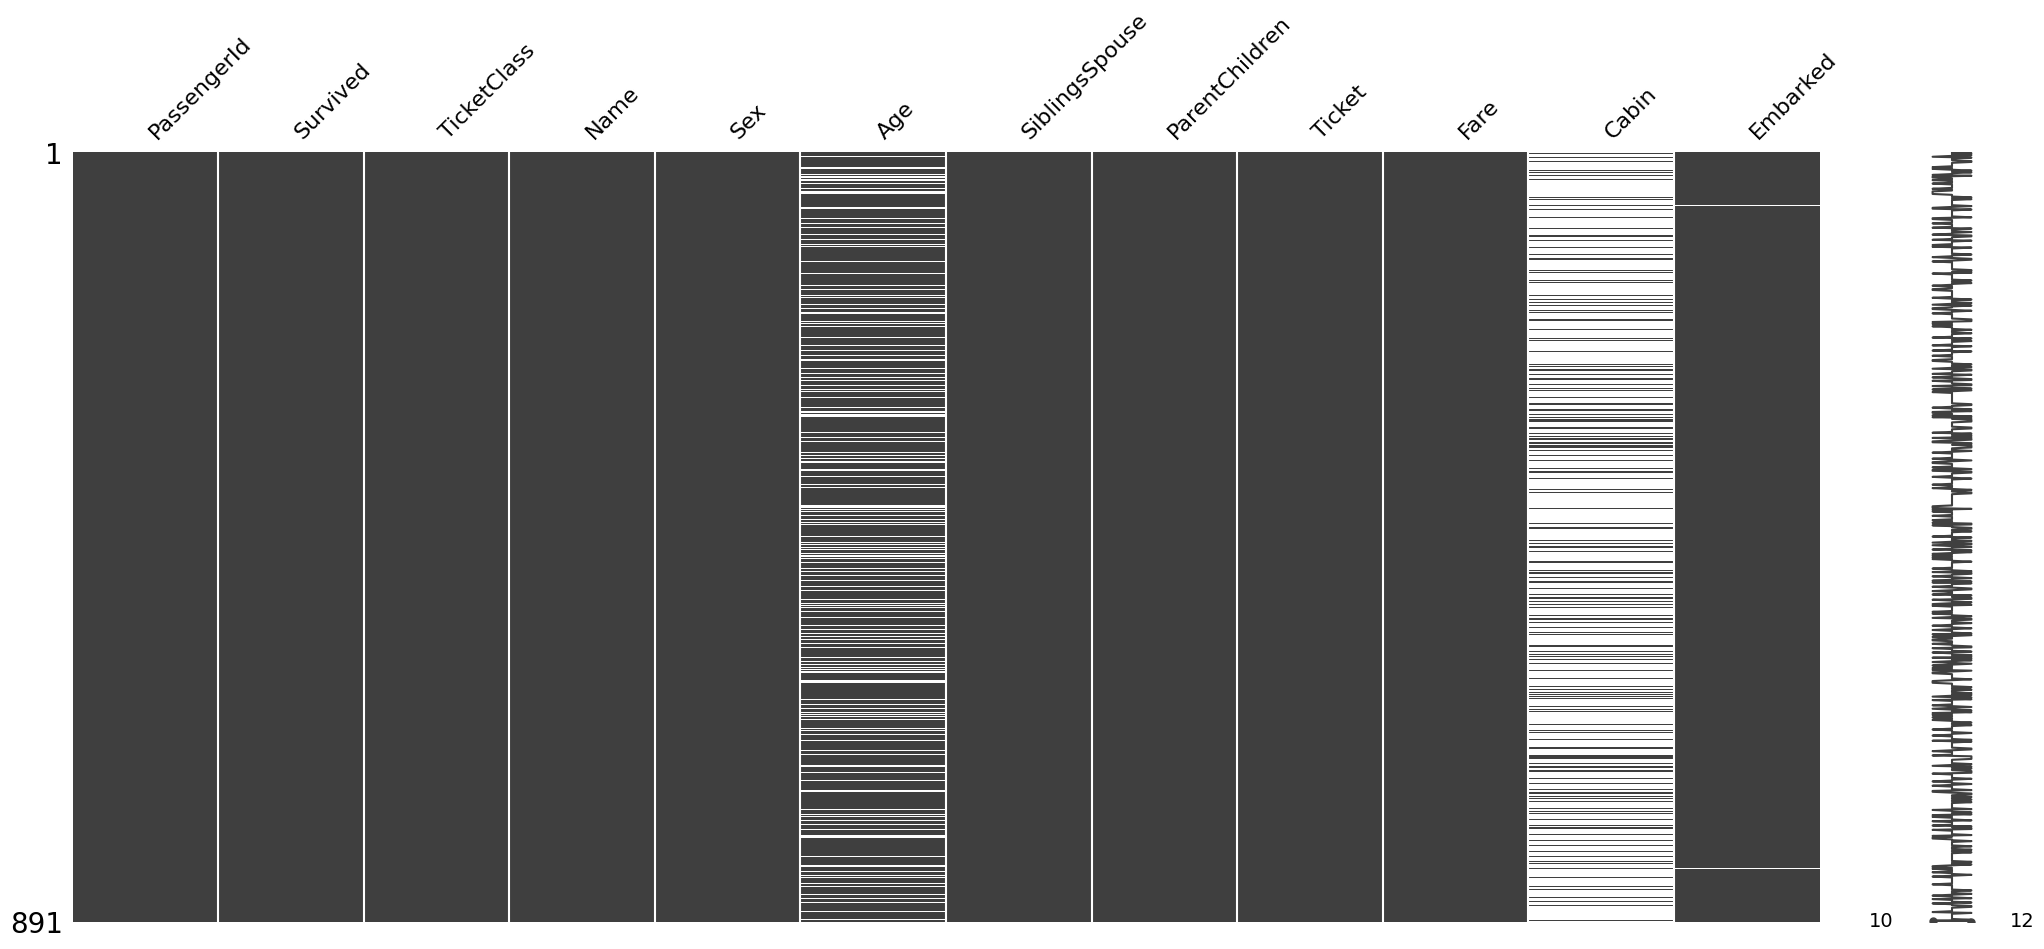

In [7]:
msno.matrix(dataset)
plt.show()

Visualize missing values using a bar plot

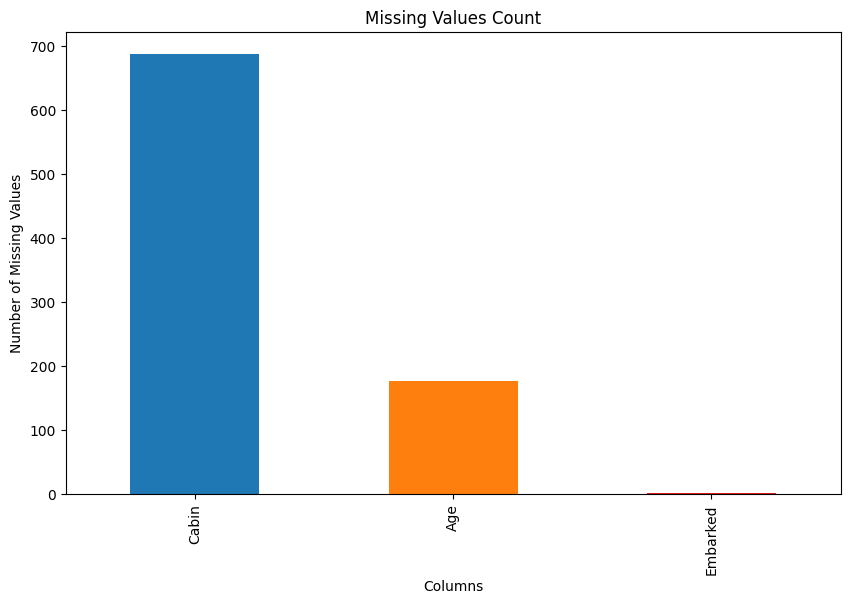

In [8]:
missing_values = dataset.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

colors = ['#1f77b4', '#ff7f0e', '#e41a1c']

missing_values.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Missing Values Count')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

Count missing values

In [9]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId         0
Survived            0
TicketClass         0
Name                0
Sex                 0
Age               177
SiblingsSpouse      0
ParentChildren      0
Ticket              0
Fare                0
Cabin             687
Embarked            2
dtype: int64


#### Handling Missing Values

Impute Missing Values
- Fill missing **_Age_** value with **Median**
- Fill missing **_Cabin_** value with **Unknown**
- Fill missing **_Embarked_** value with **Mode**

In [10]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

dataset['Cabin'].fillna('Unknown', inplace=True)

#### Checking whether there is any missing value left

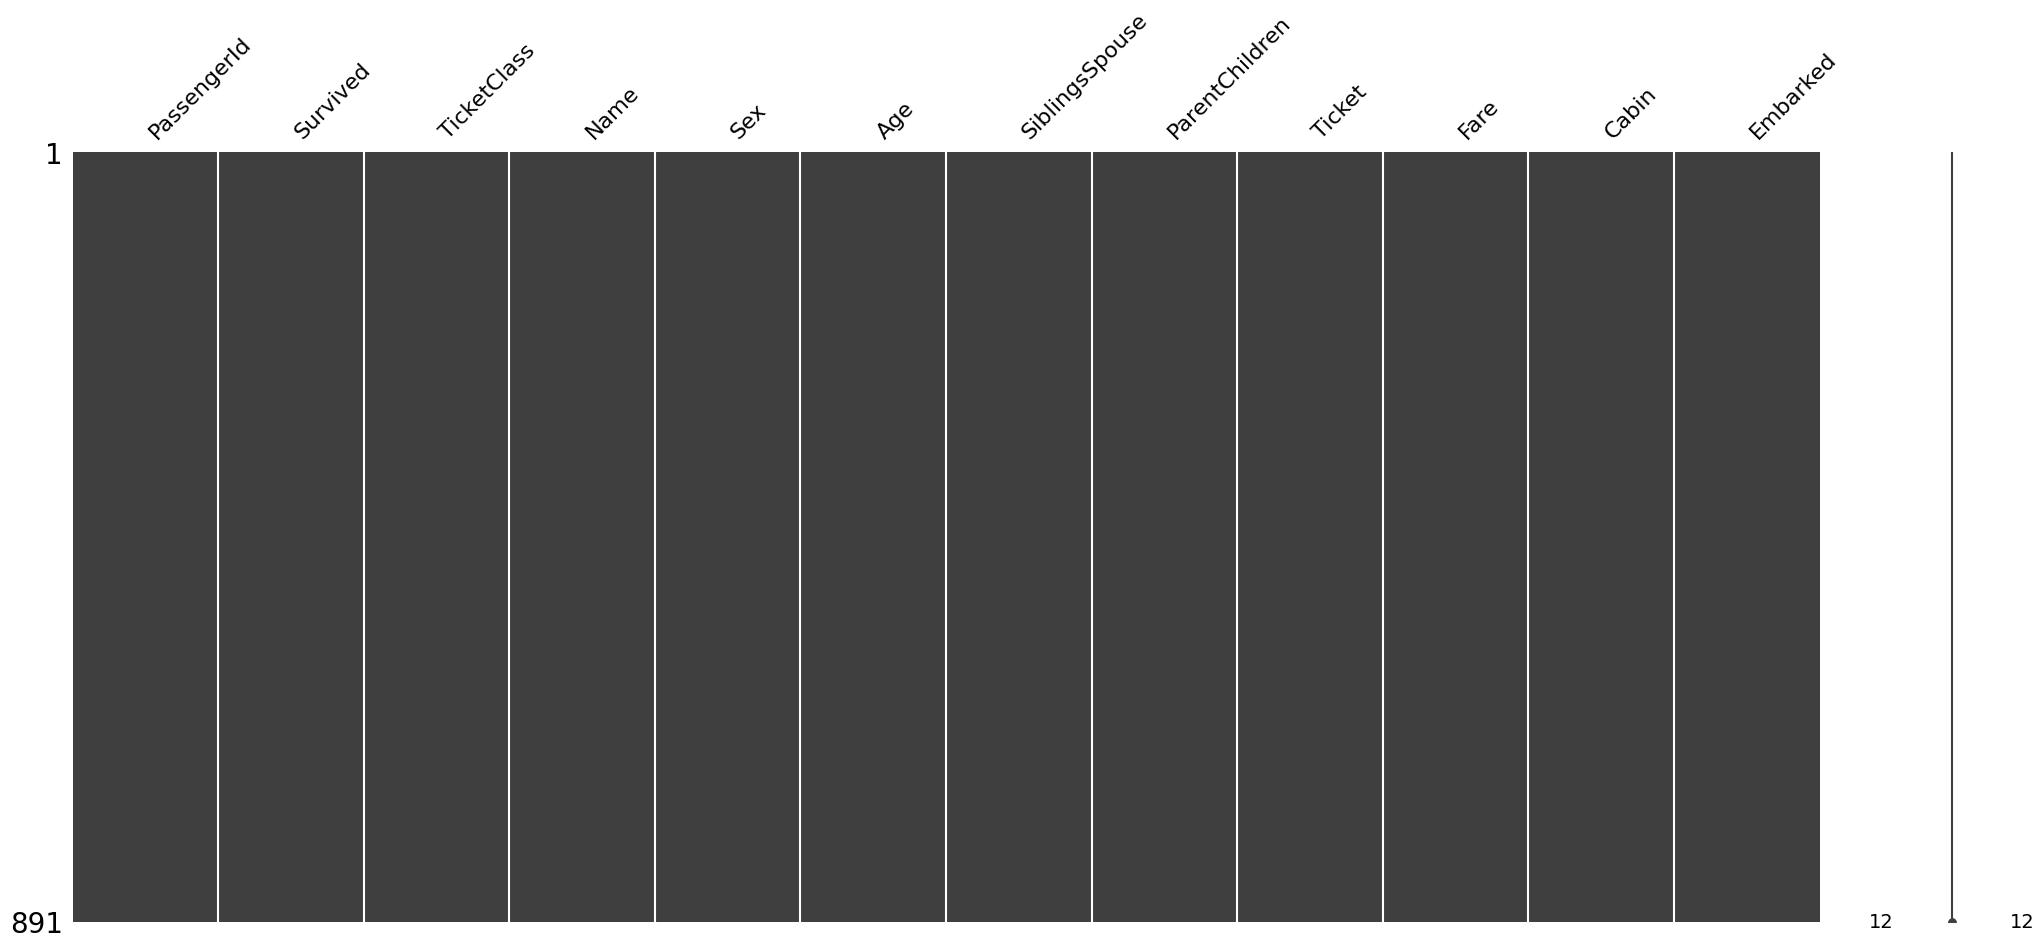

In [11]:
msno.matrix(dataset)
plt.show()

In [12]:
missing_values = dataset.isnull().sum()
print(missing_values)

PassengerId       0
Survived          0
TicketClass       0
Name              0
Sex               0
Age               0
SiblingsSpouse    0
ParentChildren    0
Ticket            0
Fare              0
Cabin             0
Embarked          0
dtype: int64


#### Categorize people by age

In [13]:
ages = dataset['Age']

def categorize_age(age):
    if age < 13:
        return 'Kids'
    elif age >=13 and age < 20:
        return 'Teenage'
    elif age >= 20 and age < 30:
        return 'Youngster'
    elif age >= 30 and age < 50:
        return 'Adult'
    elif age >= 50:
        return 'Senior'

dataset['AgeCategory'] = ages.apply(categorize_age)

## Explorartory Data Analysis (EDA)

#### Survival Plot

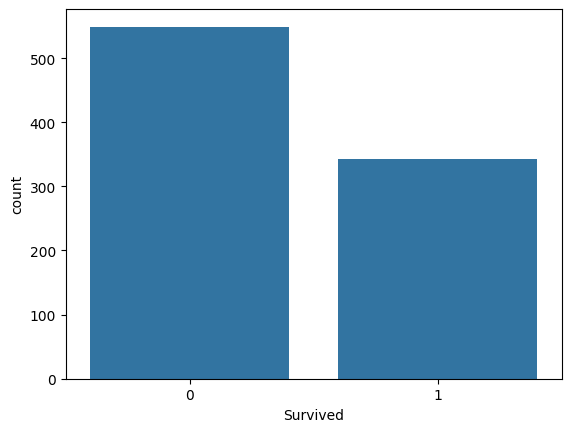

In [14]:
sns.countplot(x='Survived', data=dataset)
plt.show()

#### Gender Vs Survival Plot

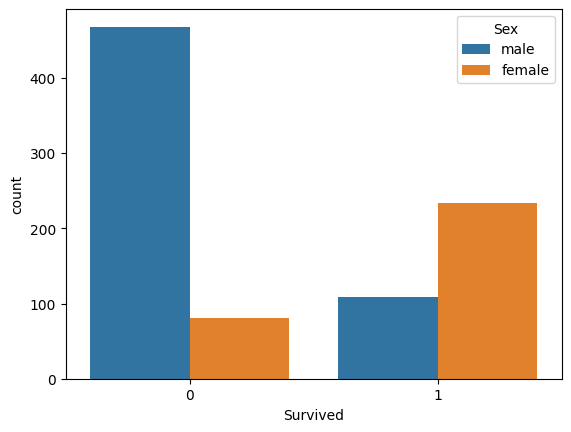

In [15]:
sns.countplot(x='Survived', hue='Sex', data=dataset)
plt.show()

#### Pclass vs Survival

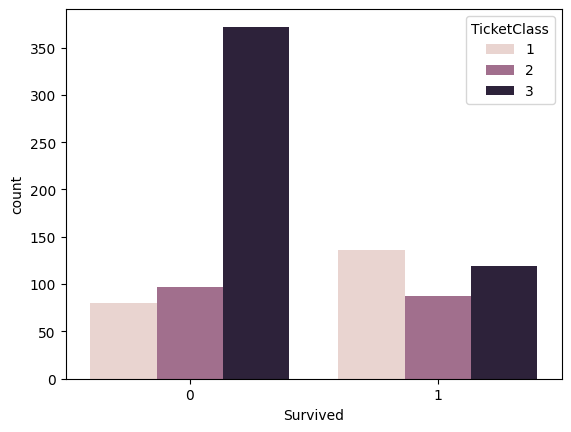

In [16]:
sns.countplot(x='Survived', hue='TicketClass', data=dataset)
plt.show()

#### Age Distribution Plot

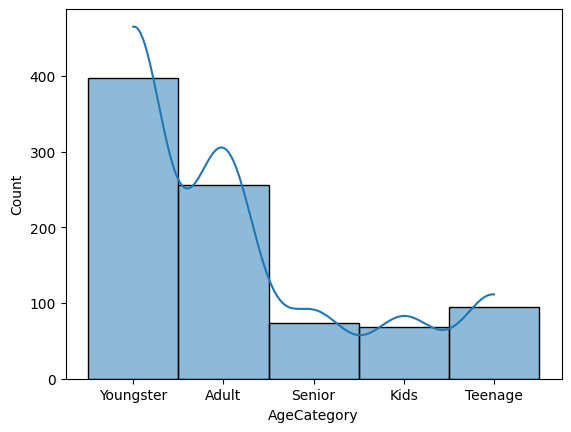

In [17]:
sns.histplot(dataset['AgeCategory'], kde=True)
plt.show()

#### Age Vs Survival Plot

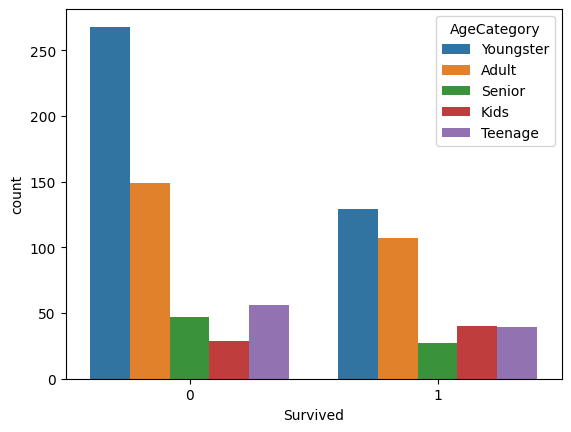

In [18]:
sns.countplot(x='Survived', hue='AgeCategory', data=dataset)
plt.show()

#### Fare distribution

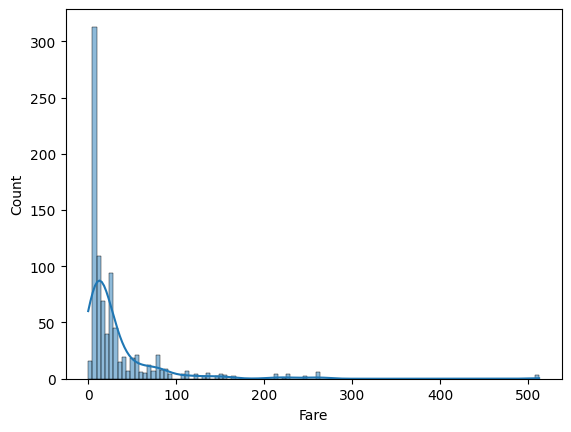

In [19]:
sns.histplot(dataset['Fare'], kde=True)
plt.show()

#### Fare Vs Survival Plot

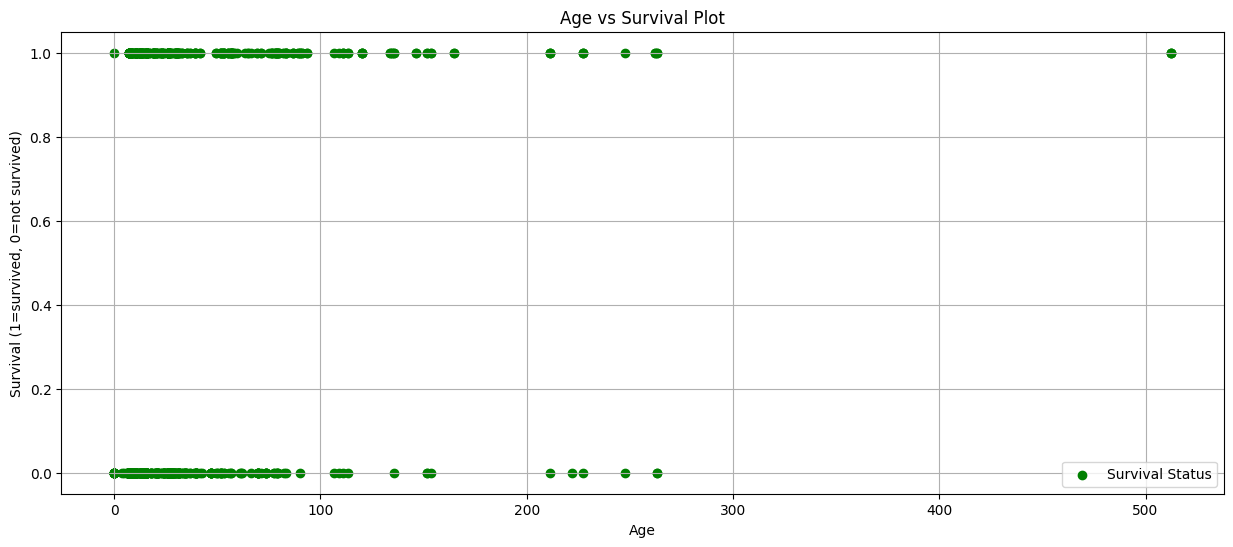

In [20]:
fare = dataset['Fare']
survival = dataset['Survived']

plt.figure(figsize=(15, 6))
plt.scatter(fare, survival, color='green', label='Survival Status')
plt.xlabel('Age')
plt.ylabel('Survival (1=survived, 0=not survived)')
plt.title('Age vs Survival Plot')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### Correlation Matrix

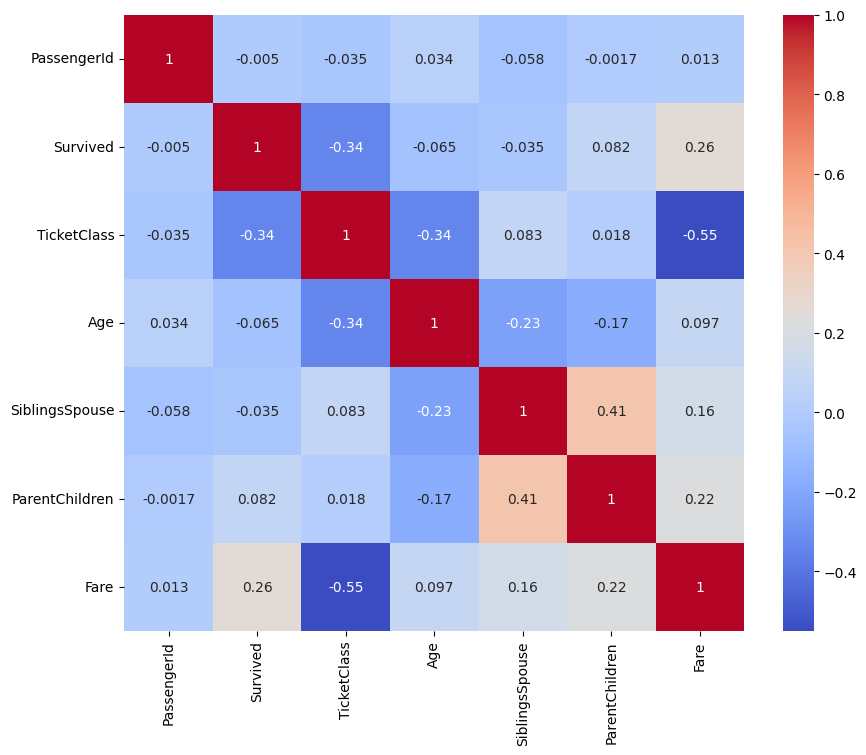

In [21]:
numeric_data = dataset.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Model Building

#### Dataset Information

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   TicketClass     891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SiblingsSpouse  891 non-null    int64  
 7   ParentChildren  891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           891 non-null    object 
 11  Embarked        891 non-null    object 
 12  AgeCategory     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


#### Drop Unused Columns

In [23]:
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#### Encode categorical variables

In [24]:
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = label_encoder.fit_transform(dataset['Embarked'])
dataset['AgeCategory'] = label_encoder.fit_transform(dataset['AgeCategory'])

#### Split Dataset

In [25]:
X = dataset[['TicketClass', 'Sex', 'Age', 'SiblingsSpouse', 'ParentChildren',  'Fare','Embarked']]
Y = dataset['Survived']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#### Logistic Regression model

In [26]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)
y_pred_logreg = logreg_model.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(Y_test, y_pred_logreg))
print("Precision:", precision_score(Y_test, y_pred_logreg))
print("Recall:", recall_score(Y_test, y_pred_logreg))
print("F1 Score:", f1_score(Y_test, y_pred_logreg))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


#### Random Forest Classifier

In [28]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("Precision:", precision_score(Y_test, y_pred_rf))
print("Recall:", recall_score(Y_test, y_pred_rf))
print("F1 Score:", f1_score(Y_test, y_pred_rf))

Accuracy: 0.8044692737430168
Precision: 0.76
Recall: 0.7702702702702703
F1 Score: 0.7651006711409396


#### Decision Tree Classifier

In [30]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
y_pred_dt = dt_model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(Y_test, y_pred_dt))
print("Precision:", precision_score(Y_test, y_pred_dt))
print("Recall:", recall_score(Y_test, y_pred_dt))
print("F1 Score:", f1_score(Y_test, y_pred_dt))

Accuracy: 0.7988826815642458
Precision: 0.7435897435897436
Recall: 0.7837837837837838
F1 Score: 0.7631578947368421


#### ANN Model

In [32]:
survival_model = Sequential(
[
    layers.Dense(10,activation='relu',name = 'layer1', input_dim=7),
    layers.Dense(10,activation='relu',name = 'layer2'),
    layers.Dense(10,activation='relu',name = 'layer3'),
    layers.Dense(1,activation='sigmoid',name='layer4')
])

#### Model Fitting

In [40]:
survival_model.compile(optimizer='adam',loss= tf.keras.losses.BinaryCrossentropy(),metrics = [tf.keras.metrics.BinaryAccuracy()])
history = survival_model.fit(X_train, Y_train, epochs=40, verbose=1)

Epoch 1/40
23/23 [==============================] - 1s 4ms/step - loss: 0.5296 - binary_accuracy: 0.7388
Epoch 2/40
23/23 [==============================] - 0s 3ms/step - loss: 0.5187 - binary_accuracy: 0.7472
Epoch 3/40
23/23 [==============================] - 0s 4ms/step - loss: 0.5107 - binary_accuracy: 0.7514
Epoch 4/40
23/23 [==============================] - 0s 4ms/step - loss: 0.5110 - binary_accuracy: 0.7640
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 0.5060 - binary_accuracy: 0.7711
Epoch 6/40
23/23 [==============================] - 0s 4ms/step - loss: 0.5066 - binary_accuracy: 0.7542
Epoch 7/40
23/23 [==============================] - 0s 5ms/step - loss: 0.5008 - binary_accuracy: 0.7654
Epoch 8/40
23/23 [==============================] - 0s 5ms/step - loss: 0.5045 - binary_accuracy: 0.7683
Epoch 9/40
23/23 [==============================] - 0s 4ms/step - loss: 0.5139 - binary_accuracy: 0.7584
Epoch 10/40
23/23 [==============================] - 0s

#### Training Loss and Accuracy

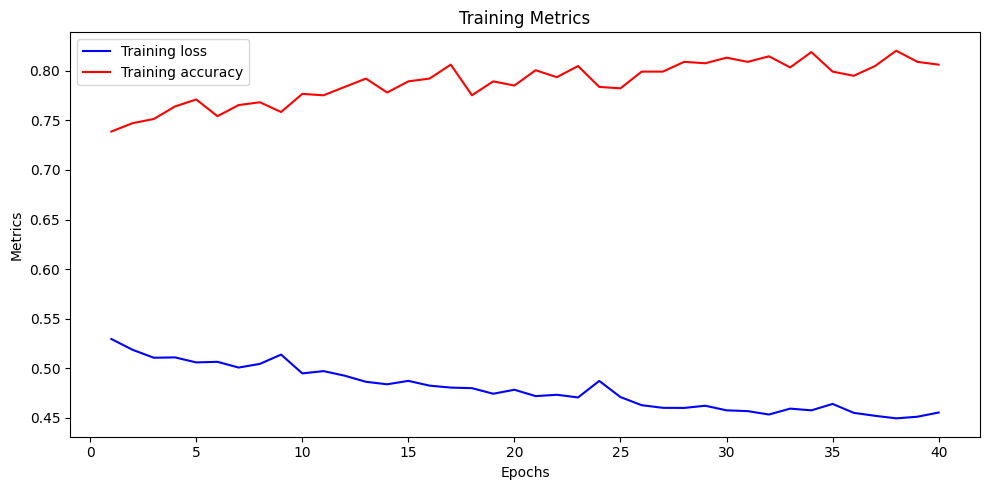

In [41]:
training_loss = history.history['loss']
training_accuracy = history.history['binary_accuracy']

epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))

plt.plot(epochs, training_loss, 'b-', label='Training loss')

plt.plot(epochs, training_accuracy, 'r-', label='Training accuracy')

plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

In [42]:
Loss_Val,Accuracy_Val = survival_model.evaluate(X_test,Y_test)

print(f"Loss : {Loss_Val}")
print(f"Accuracy : {Accuracy_Val}")

6/6 [==============================] - 0s 4ms/step - loss: 0.4580 - binary_accuracy: 0.7765
Loss : 0.458014577627182
Accuracy : 0.7765362858772278


## Interpretation

In [43]:
interpret = survival_model.predict(X_test)
Y_interpret =  (interpret > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [44]:
print(f"Accuracy Score of Interpretation : {accuracy_score(Y_test,Y_interpret)}")

Accuracy Score of Interpretation : 0.776536312849162


In [45]:
print(classification_report(Y_test,Y_interpret))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## Confusion Matrix

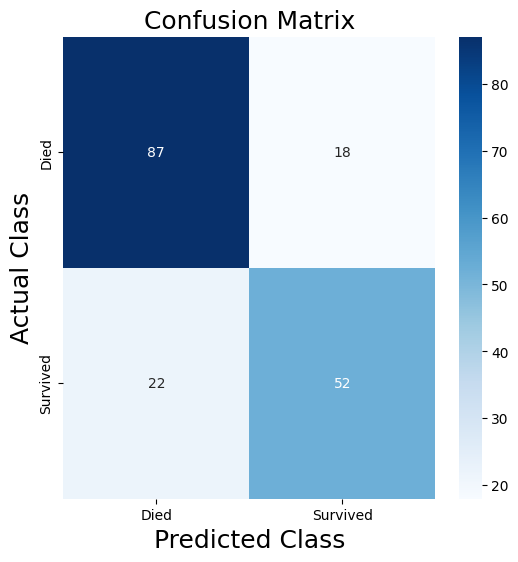

In [46]:
conf_matrix = confusion_matrix(Y_test, Y_interpret)
class_names = ['Died', 'Survived']

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt='g', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('Actual Class', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()